<div class="alert alert-success" style = "border-radius:10px;border-width:3px;border-color:white;font-family:Verdana,sans-serif;font-size:16px;">
<h2>Mixture Density Networks (MDN) for distribution and uncertainty estimation </h2>

This material is copyright Axel Brando and made available under the Creative Commons Attribution-ShareAlike 4.0 International License (http://creativecommons.org/licenses/by-sa/4.0/). Code is also made available under the Apache Version 2.0 License (https://www.apache.org/licenses/LICENSE-2.0). 

Please, to use this material and code follow the instructions explained in the main repository [https://github.com/axelbrando/Mixture-Density-Networks-for-distribution-and-uncertainty-estimation](https://github.com/axelbrando/Mixture-Density-Networks-for-distribution-and-uncertainty-estimation#bibtex-reference-format-for-citation)

<div class="alert alert-info" style = "border-radius:10px;border-width:3px;border-color:white;font-family:Verdana,sans-serif;font-size:16px;">
<h3>Time series regression problem by using LSTM</h3>

In [1]:
import tensorflow as tf
tf.python.control_flow_ops = tf

config = tf.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.Session(config=config)

from keras import backend as K

import os
import numpy as np
from pandas.io.parsers import read_csv
from sklearn.utils import shuffle
import random
from datetime import datetime

Using TensorFlow backend.


### We load our dataset
Because our dataset is private we will only expose a dummy code

In [2]:
X = np.load('Normalised-X_train.npy')
y = np.load('y_train.npy')
X_val = np.load('Normalised-X_val.npy')
y_val = np.load('y_val.npy')
X_orig = np.load('Original-X_train.npy')
X_val_orig = np.load('Original-X_val.npy')

## Comparison between different LSTM models and Mixture Density LSTM Models

In [3]:
from keras.models import Sequential,Graph
from keras.layers.core import Dense, Dropout
from keras.callbacks import History
from keras.layers.recurrent import LSTM
from keras.models import model_from_json
from keras.regularizers import l2, activity_l2

from keras import backend as K

ograph = Graph()
ograph.add_input(name='input', input_shape=(12,1,), dtype='float32')
ograph.add_node(LSTM(output_dim=128, return_sequences=True), name='LSTM1_1', input='input')
ograph.add_node(Dropout(0.5), name='Dropout1', input='LSTM1_1')
ograph.add_node(LSTM(output_dim=128, return_sequences=False), name='LSTM2_1', input='Dropout1')
ograph.add_node(Dropout(0.5), name='Dropout2', input='LSTM2_1')
ograph.add_node(Dense(output_dim=128, activation="relu"), name='FC1', input='Dropout2')
ograph.add_node(Dense(output_dim=1, activation="linear"), name='FC2', input='FC1')
ograph.add_output(name='output', input='FC2')
ograph.compile(optimizer='rmsprop', loss={'output':'mean_absolute_error'})

In [4]:
#dummy code
ograph.load_weights('MDN-weights.hdf5')

In [5]:
from datetime import datetime
start_time = datetime.now()
y_pred = ograph.predict(data={'input':X_val})['output']
end_time = datetime.now()
print 
print "*********************************  Prediction ends  *********************************"
print
print('Duration: {}'.format(end_time - start_time))


*********************************  Prediction ends  *********************************

Duration: 0:03:17.080772


Elements below tolerance: 635365
Mean Absolute Error:  110.400910833
Mean Squared Error:  9053896.50934
Root Mean Squared Error:  3008.96934337
Maximum Total Error:  [ 1459235.99922457](real: [-1459236.], predicted: [-0.00077543])
AE 10% 0.305856183215 (491146)

*********************************  End  *********************************

Duration: 0:00:01.233166


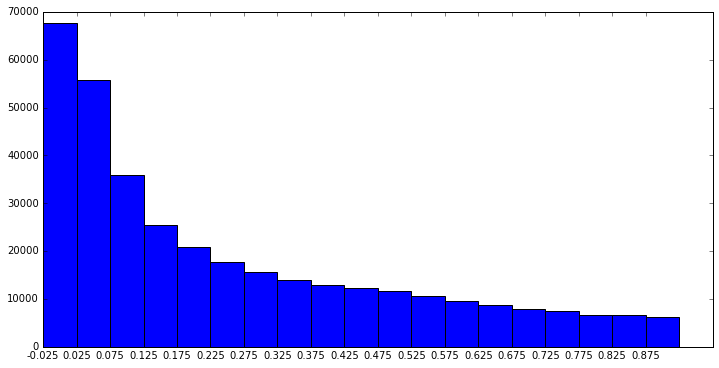

In [6]:
start_time = datetime.now()
import matplotlib.pyplot as plt
%matplotlib inline
tolerance = 1e-1
idx = np.where(np.abs(y_pred-y_val)>tolerance)[0]

print 'Elements below tolerance: ' + str(len(idx))

measure = np.mean(np.abs((y_pred-y_val*1.)))
print 'Mean Absolute Error:  ' + str(measure) 
measure = np.mean(np.power((y_pred-y_val*1.),2))
print 'Mean Squared Error:  ' + str(measure) 
measure = np.sqrt(measure)
print 'Root Mean Squared Error:  ' + str(measure) 
i = np.argmax(np.abs((y_pred-y_val*1.)))
measure = np.abs((y_pred[i]-y_val[i]*1.))
print 'Maximum Total Error:  ' + str(measure) + '(real: ' + str(y_val[i]) + ', predicted: ' + str(y_pred[i]) + ')'

measure = np.abs((y_pred[idx]-y_val[idx]))/(np.abs(y_val[idx])+1e-16)
MAE10 = np.where(measure>0.1)[0]
print 'AE 10% ' + str(1.*len(MAE10)/len(y_val)) + ' (' + str(len(MAE10)) + ')'

bins = np.arange(0,1.0,0.05)-0.025
measure = np.abs(y_pred[idx]-y_val[idx])/(np.abs(y_val[idx])+1e-16)
[dat, bins] = np.histogram(measure,bins=bins)
plt.bar(np.arange(len(dat)),dat,width =1)
plt.xticks(np.arange(len(dat)),bins[:-1])
plt.gcf().set_size_inches((10,6))

plt.gcf().set_size_inches((12,6))
 
end_time = datetime.now()
print 
print "*********************************  End  *********************************"
print
print('Duration: {}'.format(end_time - start_time))

In [7]:
ograph.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input (InputLayer)               (None, 12, 1)         0                                            
____________________________________________________________________________________________________
LSTM1_1 (LSTM)                   (None, 12, 128)       66560       input[0][0]                      
____________________________________________________________________________________________________
Dropout1 (Dropout)               (None, 12, 128)       0           LSTM1_1[0][0]                    
____________________________________________________________________________________________________
LSTM2_1 (LSTM)                   (None, 128)           131584      Dropout1[0][0]                   
___________________________________________________________________________________________

In [12]:
from keras.models import Sequential,Graph
from keras.layers.core import Dense, Dropout
from keras.callbacks import History
from keras.layers.recurrent import LSTM
from keras.models import model_from_json
from keras.regularizers import l2, activity_l2

from keras import backend as K

ograph2 = Graph()
ograph2.add_input(name='input', input_shape=(12,1,), dtype='float32')
ograph2.add_node(LSTM(output_dim=128, return_sequences=True), name='LSTM1_1', input='input')
ograph2.add_node(Dropout(0.5), name='Dropout1', input='LSTM1_1')
ograph2.add_node(LSTM(output_dim=128, return_sequences=True), name='LSTM2_1', input='Dropout1')
ograph2.add_node(Dropout(0.5), name='Dropout2', input='LSTM2_1')
ograph2.add_node(LSTM(output_dim=128, return_sequences=False), name='LSTM3_1', input='Dropout2')
ograph2.add_node(Dropout(0.5), name='Dropout3', input='LSTM3_1')
ograph2.add_node(Dense(output_dim=128, activation="relu"), name='FC1', input='Dropout3')
ograph2.add_node(Dense(output_dim=1, activation="linear"), name='FC2', input='FC1')
ograph2.add_output(name='output', input='FC2')
ograph2.compile(optimizer='rmsprop', loss={'output':'mean_absolute_error'})

In [13]:
#dummy code
ograph2.load_weights('MDN-weights.hdf5')

In [14]:
#y_pred = model.predict(X_val)['output']
from datetime import datetime
start_time = datetime.now()
y_pred = ograph2.predict(data={'input':X_val})['output']
end_time = datetime.now()

*********************************  Prediction ends  *********************************

Duration: 0:04:44.474199
Elements below tolerance: 621976
Mean Absolute Error:  109.989235589
Mean Squared Error:  9053640.58208
Root Mean Squared Error:  3008.92681567
Maximum Total Error:  [ 1459235.99927701](real: [-1459236.], predicted: [-0.00072299])
AE 10% 0.295548593324 (474594)

*********************************  End  *********************************

Duration: 0:00:00.615621


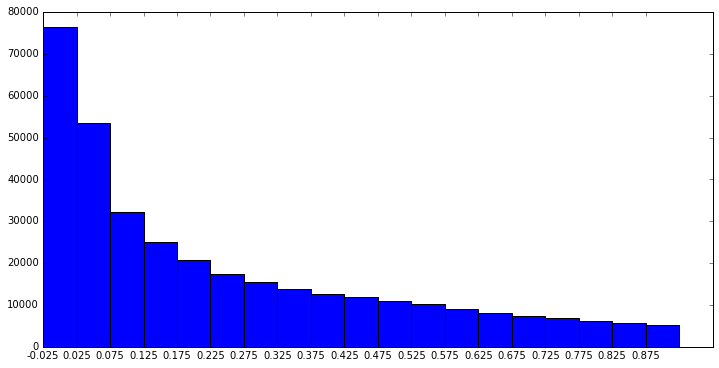

In [15]:
print "*********************************  Prediction ends  *********************************"
print
print('Duration: {}'.format(end_time - start_time))


start_time = datetime.now()
import matplotlib.pyplot as plt
%matplotlib inline
tolerance = 1e-1
idx = np.where(np.abs(y_pred-y_val)>tolerance)[0]

print 'Elements below tolerance: ' + str(len(idx))

measure = np.mean(np.abs((y_pred-y_val*1.)))
print 'Mean Absolute Error:  ' + str(measure) 
measure = np.mean(np.power((y_pred-y_val*1.),2))
print 'Mean Squared Error:  ' + str(measure) 
measure = np.sqrt(measure)
print 'Root Mean Squared Error:  ' + str(measure) 
i = np.argmax(np.abs((y_pred-y_val*1.)))
measure = np.abs((y_pred[i]-y_val[i]*1.))
print 'Maximum Total Error:  ' + str(measure) + '(real: ' + str(y_val[i]) + ', predicted: ' + str(y_pred[i]) + ')'

measure = np.abs((y_pred[idx]-y_val[idx]))/(np.abs(y_val[idx])+1e-16)
MAE10 = np.where(measure>0.1)[0]
print 'AE 10% ' + str(1.*len(MAE10)/len(y_val)) + ' (' + str(len(MAE10)) + ')'

bins = np.arange(0,1.0,0.05)-0.025
measure = np.abs(y_pred[idx]-y_val[idx])/(np.abs(y_val[idx])+1e-16)
[dat, bins] = np.histogram(measure,bins=bins)
plt.bar(np.arange(len(dat)),dat,width =1)
plt.xticks(np.arange(len(dat)),bins[:-1])
plt.gcf().set_size_inches((10,6))

plt.gcf().set_size_inches((12,6))
 
end_time = datetime.now()
print 
print "*********************************  End  *********************************"
print
print('Duration: {}'.format(end_time - start_time))

In [16]:
ograph2.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input (InputLayer)               (None, 12, 1)         0                                            
____________________________________________________________________________________________________
LSTM1_1 (LSTM)                   (None, 12, 128)       66560       input[0][0]                      
____________________________________________________________________________________________________
Dropout1 (Dropout)               (None, 12, 128)       0           LSTM1_1[0][0]                    
____________________________________________________________________________________________________
LSTM2_1 (LSTM)                   (None, 12, 128)       131584      Dropout1[0][0]                   
___________________________________________________________________________________________

In [11]:
from keras.models import Sequential,Graph
from keras.layers.core import Dense, Dropout
from keras.callbacks import History
from keras.layers.recurrent import LSTM
from keras.models import model_from_json
from keras.regularizers import l2, activity_l2

from keras import backend as K

ograph3 = Graph()
ograph3.add_input(name='input', input_shape=(12,1,), dtype='float32')
ograph3.add_node(LSTM(output_dim=256, return_sequences=True), name='LSTM1_1', input='input')
ograph3.add_node(Dropout(0.5), name='Dropout1', input='LSTM1_1')
ograph3.add_node(LSTM(output_dim=256, return_sequences=True), name='LSTM2_1', input='Dropout1')
ograph3.add_node(Dropout(0.5), name='Dropout2', input='LSTM2_1')
ograph3.add_node(LSTM(output_dim=256, return_sequences=True), name='LSTM3_1', input='Dropout2')
ograph3.add_node(Dropout(0.5), name='Dropout3', input='LSTM3_1')
ograph3.add_node(LSTM(output_dim=256, return_sequences=False), name='LSTM4_1', input='Dropout3')
ograph3.add_node(Dropout(0.5), name='Dropout4', input='LSTM4_1')
ograph3.add_node(Dense(output_dim=256, activation="relu"), name='FC1', input='Dropout4')
ograph3.add_node(Dense(output_dim=1, activation="linear"), name='FC2', input='FC1')
ograph3.add_output(name='output', input='FC2')
ograph3.compile(optimizer='rmsprop', loss={'output':'mean_absolute_error'})

In [18]:
#dummy code
ograph3.load_weights('MDN-weights.hdf5')

In [19]:
#y_pred = model.predict(X_val)['output']
from datetime import datetime
start_time = datetime.now()
y_pred = ograph3.predict(data={'input':X_val})['output']
end_time = datetime.now()
print "*********************************  Prediction ends  *********************************"
print
print('Duration: {}'.format(end_time - start_time))

*********************************  Prediction ends  *********************************

Duration: 0:06:14.859437


Elements below tolerance: 619679
Mean Absolute Error:  109.934169164
Mean Squared Error:  9053751.38505
Root Mean Squared Error:  3008.94522799
Maximum Total Error:  [ 1459236.00022386](real: [-1459236.], predicted: [ 0.00022386])
AE 10% 0.28995016213 (465604)

*********************************  End  *********************************

Duration: 0:00:00.646956


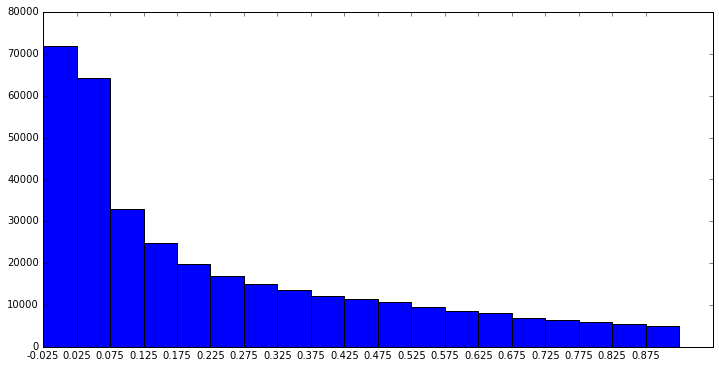

In [20]:
start_time = datetime.now()
import matplotlib.pyplot as plt
%matplotlib inline
tolerance = 1e-1
idx = np.where(np.abs(y_pred-y_val)>tolerance)[0]

print 'Elements below tolerance: ' + str(len(idx))

measure = np.mean(np.abs((y_pred-y_val*1.)))
print 'Mean Absolute Error:  ' + str(measure) 
measure = np.mean(np.power((y_pred-y_val*1.),2))
print 'Mean Squared Error:  ' + str(measure) 
measure = np.sqrt(measure)
print 'Root Mean Squared Error:  ' + str(measure) 
i = np.argmax(np.abs((y_pred-y_val*1.)))
measure = np.abs((y_pred[i]-y_val[i]*1.))
print 'Maximum Total Error:  ' + str(measure) + '(real: ' + str(y_val[i]) + ', predicted: ' + str(y_pred[i]) + ')'

measure = np.abs((y_pred[idx]-y_val[idx]))/(np.abs(y_val[idx])+1e-16)
MAE10 = np.where(measure>0.1)[0]
print 'AE 10% ' + str(1.*len(MAE10)/len(y_val)) + ' (' + str(len(MAE10)) + ')'

bins = np.arange(0,1.0,0.05)-0.025
measure = np.abs(y_pred[idx]-y_val[idx])/(np.abs(y_val[idx])+1e-16)
[dat, bins] = np.histogram(measure,bins=bins)
plt.bar(np.arange(len(dat)),dat,width =1)
plt.xticks(np.arange(len(dat)),bins[:-1])
plt.gcf().set_size_inches((10,6))

plt.gcf().set_size_inches((12,6))
 
end_time = datetime.now()
print 
print "*********************************  End  *********************************"
print
print('Duration: {}'.format(end_time - start_time))

In [21]:
ograph3.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input (InputLayer)               (None, 12, 1)         0                                            
____________________________________________________________________________________________________
LSTM1_1 (LSTM)                   (None, 12, 256)       264192      input[0][0]                      
____________________________________________________________________________________________________
Dropout1 (Dropout)               (None, 12, 256)       0           LSTM1_1[0][0]                    
____________________________________________________________________________________________________
LSTM2_1 (LSTM)                   (None, 12, 256)       525312      Dropout1[0][0]                   
___________________________________________________________________________________________


*********************************  Prediction ends  *********************************

Duration: 0:00:00.002236
Elements below tolerance: 570186
Mean Absolute Error:  160.146857001
Mean Squared Error:  9104905.15196
Root Mean Squared Error:  3017.43353729
Maximum Total Error:  [ 1459236.](real: [-1459236.], predicted: [ 0.])
AE 10% 0.355077540452 (570186)

*********************************  End  *********************************

Duration: 0:00:00.592520


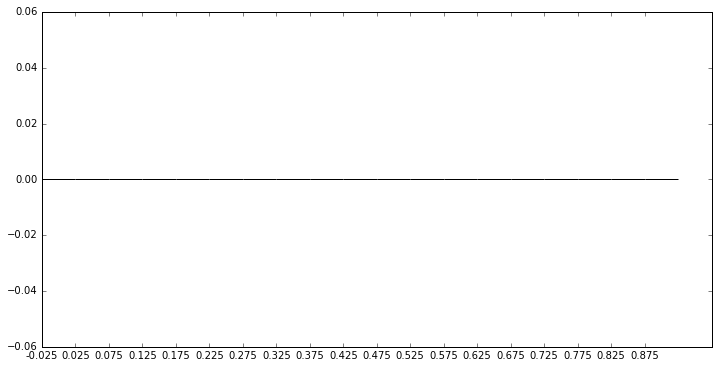

In [22]:
from datetime import datetime
start_time = datetime.now()
##y_predg2 = graphG2.predict(data={'input':X_val})['output']
c=1
m=1
y_pred = np.zeros_like(y_pred)

end_time = datetime.now()
print 
print "*********************************  Prediction ends  *********************************"
print
print('Duration: {}'.format(end_time - start_time))
#y_pred = y_predg2

from datetime import datetime
start_time = datetime.now()
import matplotlib.pyplot as plt
%matplotlib inline
tolerance = 1e-1
idx = np.where(np.abs(y_pred-y_val)>tolerance)[0]

print 'Elements below tolerance: ' + str(len(idx))

measure = np.mean(np.abs((y_pred-y_val*1.)))
print 'Mean Absolute Error:  ' + str(measure) 
measure = np.mean(np.power((y_pred-y_val*1.),2))
print 'Mean Squared Error:  ' + str(measure) 
measure = np.sqrt(measure)
print 'Root Mean Squared Error:  ' + str(measure) 
i = np.argmax(np.abs((y_pred-y_val*1.)))
measure = np.abs((y_pred[i]-y_val[i]*1.))
print 'Maximum Total Error:  ' + str(measure) + '(real: ' + str(y_val[i]) + ', predicted: ' + str(y_pred[i]) + ')'

measure = np.abs((y_pred[idx]-y_val[idx]))/(np.abs(y_val[idx])+1e-16)
MAE10 = np.where(measure>0.1)[0]
print 'AE 10% ' + str(1.*len(MAE10)/len(y_val)) + ' (' + str(len(MAE10)) + ')'

bins = np.arange(0,1.0,0.05)-0.025
measure = np.abs(y_pred[idx]-y_val[idx])/(np.abs(y_val[idx])+1e-16)
[dat, bins] = np.histogram(measure,bins=bins)
plt.bar(np.arange(len(dat)),dat,width =1)
plt.xticks(np.arange(len(dat)),bins[:-1])
plt.gcf().set_size_inches((10,6))

plt.gcf().set_size_inches((12,6))
 
end_time = datetime.now()
print 
print "*********************************  End  *********************************"
print
print('Duration: {}'.format(end_time - start_time))

In [23]:
from keras.models import Sequential,Graph
from keras.layers.core import Dense, Dropout
from keras.callbacks import History
from keras.layers.recurrent import LSTM
from keras.models import model_from_json
from keras.regularizers import l2, activity_l2

from keras import backend as K

import numpy as np

c = 1 #The number of outputs we want to predict
m = 1 #The number of distributions we want to use in the mixture

#Note: The output size will be (c + 2) * m

def log_sum_exp(x, axis=None):
    """Log-sum-exp trick implementation"""
    x_max = K.max(x, axis=axis, keepdims=True)
    return K.log(K.sum(K.exp(x - x_max), 
                       axis=axis, keepdims=True))+x_max


def mean_log_Gaussian_like(y_true, parameters):
    """Mean Log Gaussian Likelihood distribution
    Note: The 'c' variable is obtained as global variable
    """
    components = K.reshape(parameters,[-1, c + 2, m])
    mu = components[:, :c, :]
    sigma = components[:, c, :]
    alpha = components[:, c + 1, :]
    alpha = K.softmax(K.clip(alpha,1e-8,1.))
    
    exponent = K.log(alpha) - .5 * float(c) * K.log(2 * np.pi) \
    - float(c) * K.log(sigma) \
    - K.sum((K.expand_dims(y_true,2) - mu)**2, axis=1)/(2*(sigma)**2)
    
    log_gauss = log_sum_exp(exponent, axis=1)
    res = - K.mean(log_gauss)
    return res


def mean_log_LaPlace_like(y_true, parameters):
    """Mean Log Laplace Likelihood distribution
    Note: The 'c' variable is obtained as global variable
    """
    components = K.reshape(parameters,[-1, c + 2, m])
    mu = components[:, :c, :]
    sigma = components[:, c, :]
    alpha = components[:, c + 1, :]
    alpha = K.softmax(K.clip(alpha,1e-2,1.))
    
    exponent = K.log(alpha) - float(c) * K.log(2 * sigma) \
    - K.sum(K.abs(K.expand_dims(y_true,2) - mu), axis=1)/(sigma)
    
    log_gauss = log_sum_exp(exponent, axis=1)
    res = - K.mean(log_gauss)
    return res

graphG = Graph()
graphG.add_input(name='input', input_shape=(12,1,), dtype='float32')
graphG.add_node(LSTM(output_dim=128, return_sequences=True), name='LSTM1_1', input='input')
graphG.add_node(Dropout(0.5), name='Dropout1', input='LSTM1_1')
graphG.add_node(LSTM(output_dim=128, return_sequences=True), name='LSTM2_1', input='Dropout1')
graphG.add_node(Dropout(0.5), name='Dropout2', input='LSTM2_1')
graphG.add_node(LSTM(output_dim=128, return_sequences=False), name='LSTM3_1', input='Dropout2')
graphG.add_node(Dropout(0.5), name='Dropout3', input='LSTM3_1')
graphG.add_node(Dense(output_dim=128, activation="relu"), name='FC1', input='Dropout3')
graphG.add_node(Dense(output_dim=c*m), name='FC_mus', input='FC1')
graphG.add_node(Dense(output_dim=m, activation=K.exp, W_regularizer=l2(1e-3)), name='FC_sigmas', input='FC1')
graphG.add_node(Dense(output_dim=m, activation='softmax'), name='FC_alphas', input='FC1')
graphG.add_output(name='output', inputs=['FC_mus','FC_sigmas', 'FC_alphas'], merge_mode='concat',concat_axis=1)
graphG.compile(optimizer='rmsprop', loss={'output':mean_log_likeG})

In [24]:
#dummy code
graphG.load_weights('MDN-weights.hdf5')

In [25]:
#y_pred = model.predict(X_val)['output']
from datetime import datetime
start_time = datetime.now()
y_pred = graphG.predict(data={'input':X_val})['output']
end_time = datetime.now()
print 
print "*********************************  Prediction ends  *********************************"
print
print('Duration: {}'.format(end_time - start_time))


*********************************  Prediction ends  *********************************

Duration: 0:04:51.455047



*********************************  Prediction ends  *********************************

Duration: 0:00:02.429238
Elements below tolerance: 1604993
Mean Absolute Error:  174.063290169
Mean Squared Error:  9102559.05139
Root Mean Squared Error:  3017.04475462
Maximum Total Error:  [ 1459199.92052078](real: [-1459236.], predicted: [-36.07947922])
AE 10% 0.983303099314 (1578995)

*********************************  End  *********************************

Duration: 0:00:00.570887


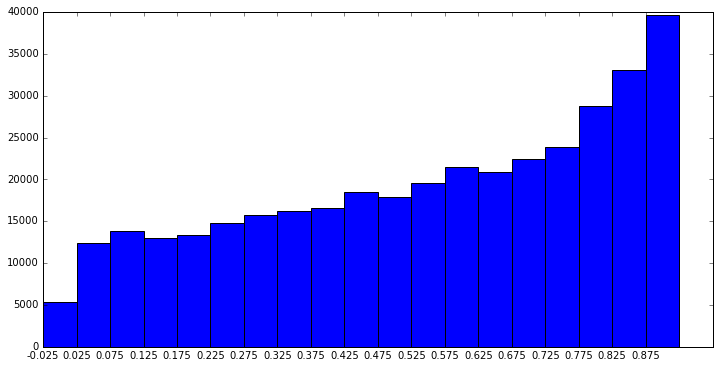

In [26]:
from datetime import datetime
start_time = datetime.now()
c=1
m=1
comp = np.reshape(y_pred,[-1, c + 2, m])
mu_pred = comp[:, :c, :]
sigma_pred = comp[:, c, :]
alpha_pred = comp[:, c + 1, :]
alpha_pred=alpha_pred.argmax(axis=1)
y_pred = np.array([mu_pred[i,:,alpha_pred[i]] for i in xrange(len(mu_pred))])


end_time = datetime.now()
print 
print "*********************************  Prediction ends  *********************************"
print
print('Duration: {}'.format(end_time - start_time))

from datetime import datetime
start_time = datetime.now()
import matplotlib.pyplot as plt
%matplotlib inline
tolerance = 1e-1
idx = np.where(np.abs(y_pred-y_val)>tolerance)[0]

print 'Elements below tolerance: ' + str(len(idx))

measure = np.mean(np.abs((y_pred-y_val*1.)))
print 'Mean Absolute Error:  ' + str(measure) 
measure = np.mean(np.power((y_pred-y_val*1.),2))
print 'Mean Squared Error:  ' + str(measure) 
measure = np.sqrt(measure)
print 'Root Mean Squared Error:  ' + str(measure) 
i = np.argmax(np.abs((y_pred-y_val*1.)))
measure = np.abs((y_pred[i]-y_val[i]*1.))
print 'Maximum Total Error:  ' + str(measure) + '(real: ' + str(y_val[i]) + ', predicted: ' + str(y_pred[i]) + ')'

measure = np.abs((y_pred[idx]-y_val[idx]))/(np.abs(y_val[idx])+1e-16)
MAE10 = np.where(measure>0.1)[0]
print 'AE 10% ' + str(1.*len(MAE10)/len(y_val)) + ' (' + str(len(MAE10)) + ')'

bins = np.arange(0,1.0,0.05)-0.025
measure = np.abs(y_pred[idx]-y_val[idx])/(np.abs(y_val[idx])+1e-16)
[dat, bins] = np.histogram(measure,bins=bins)
plt.bar(np.arange(len(dat)),dat,width =1)
plt.xticks(np.arange(len(dat)),bins[:-1])
plt.gcf().set_size_inches((10,6))

plt.gcf().set_size_inches((12,6))
 
end_time = datetime.now()
print 
print "*********************************  End  *********************************"
print
print('Duration: {}'.format(end_time - start_time))

In [37]:
from keras.models import Sequential,Graph
from keras.layers.core import Dense, Dropout
from keras.callbacks import History
from keras.layers.recurrent import LSTM
from keras.models import model_from_json
from keras.regularizers import l2, activity_l2

from keras import backend as K

import numpy as np

c = 1 #The number of outputs we want to predict
m = 1 #The number of distributions we want to use in the mixture

#Note: The output size will be (c + 2) * m

def log_sum_exp(x, axis=None):
    """Log-sum-exp trick implementation"""
    x_max = K.max(x, axis=axis, keepdims=True)
    return K.log(K.sum(K.exp(x - x_max), 
                       axis=axis, keepdims=True))+x_max


def mean_log_Gaussian_like(y_true, parameters):
    """Mean Log Gaussian Likelihood distribution
    Note: The 'c' variable is obtained as global variable
    """
    components = K.reshape(parameters,[-1, c + 2, m])
    mu = components[:, :c, :]
    sigma = components[:, c, :]
    alpha = components[:, c + 1, :]
    alpha = K.softmax(K.clip(alpha,1e-8,1.))
    
    exponent = K.log(alpha) - .5 * float(c) * K.log(2 * np.pi) \
    - float(c) * K.log(sigma) \
    - K.sum((K.expand_dims(y_true,2) - mu)**2, axis=1)/(2*(sigma)**2)
    
    log_gauss = log_sum_exp(exponent, axis=1)
    res = - K.mean(log_gauss)
    return res


def mean_log_LaPlace_like(y_true, parameters):
    """Mean Log Laplace Likelihood distribution
    Note: The 'c' variable is obtained as global variable
    """
    components = K.reshape(parameters,[-1, c + 2, m])
    mu = components[:, :c, :]
    sigma = components[:, c, :]
    alpha = components[:, c + 1, :]
    alpha = K.softmax(K.clip(alpha,1e-2,1.))
    
    exponent = K.log(alpha) - float(c) * K.log(2 * sigma) \
    - K.sum(K.abs(K.expand_dims(y_true,2) - mu), axis=1)/(sigma)
    
    log_gauss = log_sum_exp(exponent, axis=1)
    res = - K.mean(log_gauss)
    return res


graphLP = Graph()
graphLP.add_input(name='input', input_shape=(12,1,), dtype='float32')
graphLP.add_node(LSTM(output_dim=128, return_sequences=True), name='LSTM1_1', input='input')
graphLP.add_node(Dropout(0.5), name='Dropout1', input='LSTM1_1')
graphLP.add_node(LSTM(output_dim=128, return_sequences=True), name='LSTM2_1', input='Dropout1')
graphLP.add_node(Dropout(0.5), name='Dropout2', input='LSTM2_1')
graphLP.add_node(LSTM(output_dim=128, return_sequences=False), name='LSTM3_1', input='Dropout2')
graphLP.add_node(Dropout(0.5), name='Dropout3', input='LSTM3_1')
graphLP.add_node(Dense(output_dim=128, activation="relu"), name='FC1', input='Dropout3')
graphLP.add_node(Dense(output_dim=c*m), name='FC_mus', input='FC1')
graphLP.add_node(Dense(output_dim=m, activation=K.exp, W_regularizer=l2(1e-3)), name='FC_sigmas', input='FC1')
graphLP.add_node(Dense(output_dim=m, activation='softmax'), name='FC_alphas', input='FC1')
graphLP.add_output(name='output', inputs=['FC_mus','FC_sigmas', 'FC_alphas'], merge_mode='concat',concat_axis=1)
graphLP.compile(optimizer='rmsprop', loss={'output':mean_log_LaPlace_like})

In [38]:
#dummy code
graphLP.load_weights('MDN-weights.hdf5')

In [29]:
#y_pred = model.predict(X_val)['output']
from datetime import datetime
start_time = datetime.now()
y_pred = graphLP.predict(data={'input':X_val})['output']
end_time = datetime.now()
print 
print "*********************************  Prediction ends  *********************************"
print
print('Duration: {}'.format(end_time - start_time))


*********************************  Prediction ends  *********************************

Duration: 0:04:50.729723



*********************************  Prediction ends  *********************************

Duration: 0:00:02.218120
Elements below tolerance: 661977
Mean Absolute Error:  114.283108227
Mean Squared Error:  9056219.58286
Root Mean Squared Error:  3009.3553434
Maximum Total Error:  [ 1459236.50285828](real: [-1459236.], predicted: [ 0.50285828])
AE 10% 0.346161151371 (555868)

*********************************  End  *********************************

Duration: 0:00:00.397627


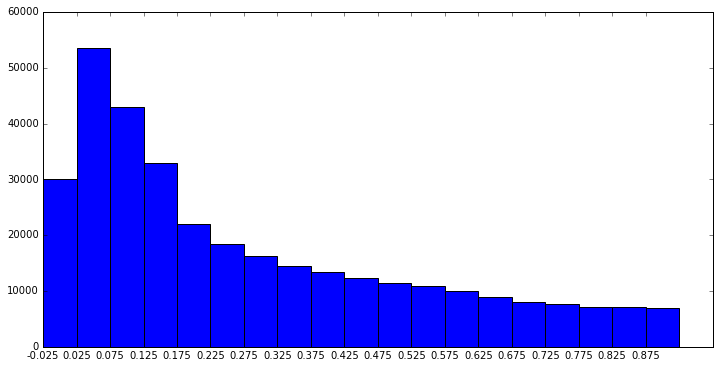

In [30]:
from datetime import datetime
start_time = datetime.now()
c=1
m=1
comp = np.reshape(y_pred,[-1, c + 2, m])
mu_pred = comp[:, :c, :]
sigma_pred = comp[:, c, :]
alpha_pred = comp[:, c + 1, :]
alpha_pred=alpha_pred.argmax(axis=1)
y_pred = np.array([mu_pred[i,:,alpha_pred[i]] for i in xrange(len(mu_pred))])


end_time = datetime.now()
print 
print "*********************************  Prediction ends  *********************************"
print
print('Duration: {}'.format(end_time - start_time))

from datetime import datetime
start_time = datetime.now()
import matplotlib.pyplot as plt
%matplotlib inline
tolerance = 1e-1
idx = np.where(np.abs(y_pred-y_val)>tolerance)[0]

print 'Elements below tolerance: ' + str(len(idx))

measure = np.mean(np.abs((y_pred-y_val*1.)))
print 'Mean Absolute Error:  ' + str(measure) 
measure = np.mean(np.power((y_pred-y_val*1.),2))
print 'Mean Squared Error:  ' + str(measure) 
measure = np.sqrt(measure)
print 'Root Mean Squared Error:  ' + str(measure) 
i = np.argmax(np.abs((y_pred-y_val*1.)))
measure = np.abs((y_pred[i]-y_val[i]*1.))
print 'Maximum Total Error:  ' + str(measure) + '(real: ' + str(y_val[i]) + ', predicted: ' + str(y_pred[i]) + ')'

measure = np.abs((y_pred[idx]-y_val[idx]))/(np.abs(y_val[idx])+1e-16)
MAE10 = np.where(measure>0.1)[0]
print 'AE 10% ' + str(1.*len(MAE10)/len(y_val)) + ' (' + str(len(MAE10)) + ')'

bins = np.arange(0,1.0,0.05)-0.025
measure = np.abs(y_pred[idx]-y_val[idx])/(np.abs(y_val[idx])+1e-16)
[dat, bins] = np.histogram(measure,bins=bins)
plt.bar(np.arange(len(dat)),dat,width =1)
plt.xticks(np.arange(len(dat)),bins[:-1])
plt.gcf().set_size_inches((10,6))

plt.gcf().set_size_inches((12,6))
 
end_time = datetime.now()
print 
print "*********************************  End  *********************************"
print
print('Duration: {}'.format(end_time - start_time))

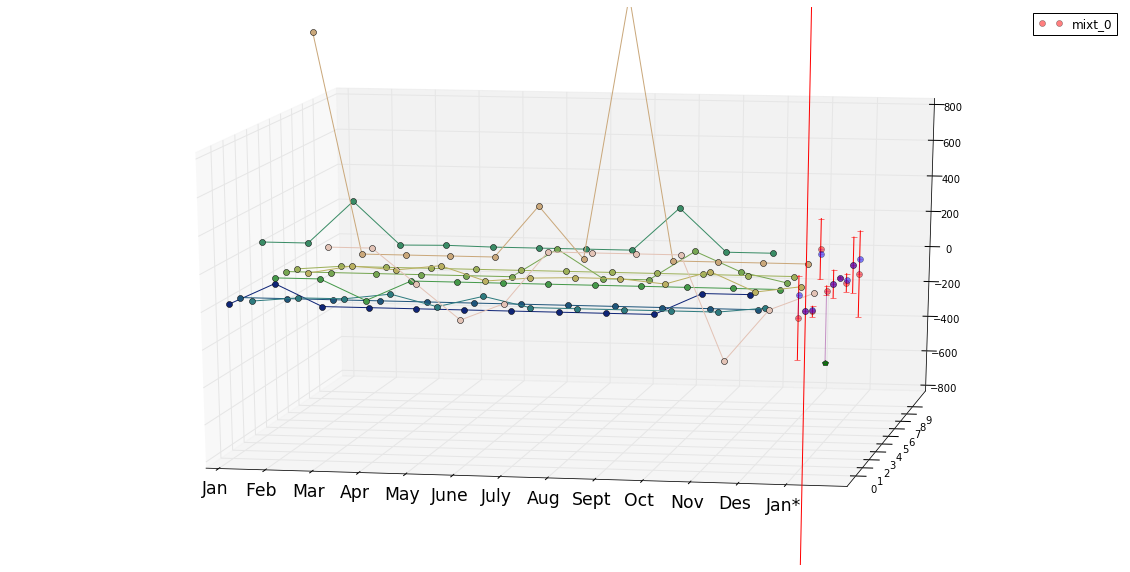

In [41]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib inline

import matplotlib.cm as cm

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

rang = 10
start = np.random.randint(0,y_val.shape[0]-rang)
v_rang = 1000

c=1
m=1

parameters = graphLP.predict(data={'input':X_val[start:start+rang]})['output']

comp = np.reshape(parameters,[-1, c + 2, m])
mu_pred = comp[:, :c, :]
sigma_pred = comp[:, c, :]
alpha_pred = comp[:, c + 1, :]
y_pred = np.zeros((len(mu_pred)))

thr_alpha = 0.5

col = cm.autumn(np.linspace(0, 1, mu_pred.shape[-1]))

cont = []
cont_const = []
const = 100
guany_sig = []
erSigConst = np.zeros((2,rang))


color = cm.gist_earth(np.linspace(0, 1, rang+2))

for elem in xrange(rang):
    ax.plot(xs=np.arange(12),ys=[elem]*12,zs=X_val_orig[start+elem,:,0].reshape(-1), c=color[elem+1], marker='o')

zerror = 500

    
for mx in xrange(mu_pred.shape[-1]):
    for i in xrange(len(mu_pred)):
        if alpha_pred[i,mx] > thr_alpha:
            ax.plot([12, 12], [i, i], [mu_pred[i,0,mx]-np.sqrt(2)*sigma_pred[i,mx],
                                       mu_pred[i,0,mx]+np.sqrt(2)*sigma_pred[i,mx]], 
                    marker="_", c=col[mx], alpha=alpha_pred[i,mx])
            y_pred[i] = mu_pred[i,0,mx]
            #In order to avoid ERROR of 0.1 when approx 0, we add a margin of 0.1€
            if mu_pred[i,0,mx]+np.sqrt(2)*sigma_pred[i,mx]+0.1<y_val[start+i] or mu_pred[i,0,mx]-np.sqrt(2)*sigma_pred[i,mx]-0.1>y_val[start+i]:
                cont += [i]
                if mu_pred[i,0,mx]+const<y_val[start+i] or mu_pred[i,0,mx]-const>y_val[start+i]:
                    guany_sig += [const-np.sqrt(2)*sigma_pred[i,mx]-0.1]
                    cont_const += [i]
                else:
                    guany_sig += [np.sqrt(2)*sigma_pred[i,mx]+0.1-const]
            elif mu_pred[i,0,mx]+const<y_val[start+i] or mu_pred[i,0,mx]-const>y_val[start+i]:
                cont_const += [i]
                guany_sig += [const-np.sqrt(2)*sigma_pred[i,mx]-0.1]
            
            erSigConst[0,i] = np.sqrt(2)*sigma_pred[i,mx]+0.1 - np.abs(mu_pred[i,0,mx]-y_val[start+i])
            erSigConst[1,i] = const - np.abs(mu_pred[i,0,mx]-y_val[start+i])
    
    tmp = alpha_pred[:,mx]>thr_alpha
    if np.sum(tmp) > 0:
        ax.plot([12]*rang,np.arange(rang)[tmp],
                    y_pred[tmp], color=col[mx],
                    linewidth=1, marker='o', linestyle=' ',
                    alpha=0.5, label='mixt_'+str(mx))
    else:
        print "Distribution",mx," has always alpha below",thr_alpha
        
for point in xrange(rang):
    if point in cont:
        ax.plot(xs=12, ys=point,zs=y_val[start+point], 
                color='green', linewidth=1, marker='p', 
                linestyle=' ',alpha=1)
    else:
        ax.plot(xs=12, ys=point,zs=y_val[start+point], 
                color='blue', linewidth=1, marker='o', 
                linestyle=' ',alpha=0.5)
    ax.plot(xs=[12, 12], ys=[point, point],zs=[y_val[start+point],y_pred[point]],
            marker="_", alpha = 0.4, color = 'purple')


ax.xaxis.set_ticks(range(13))
ax.xaxis.set_ticklabels(['Jan','Feb','Mar','Apr',
                    'May','June','July','Aug',
                    'Sept','Oct','Nov','Des','Jan*'])
ax.xaxis.set_tick_params(labelsize='xx-large')
ax.yaxis.set_ticks(range(rang))


ax.set_xlim3d(0, 13)
ax.set_ylim3d(-1, rang+1)
ax.set_zlim3d(-800, 800)
ax.view_init(15, -80)

plt.gcf().set_size_inches((20,10))
plt.legend()
plt.show()

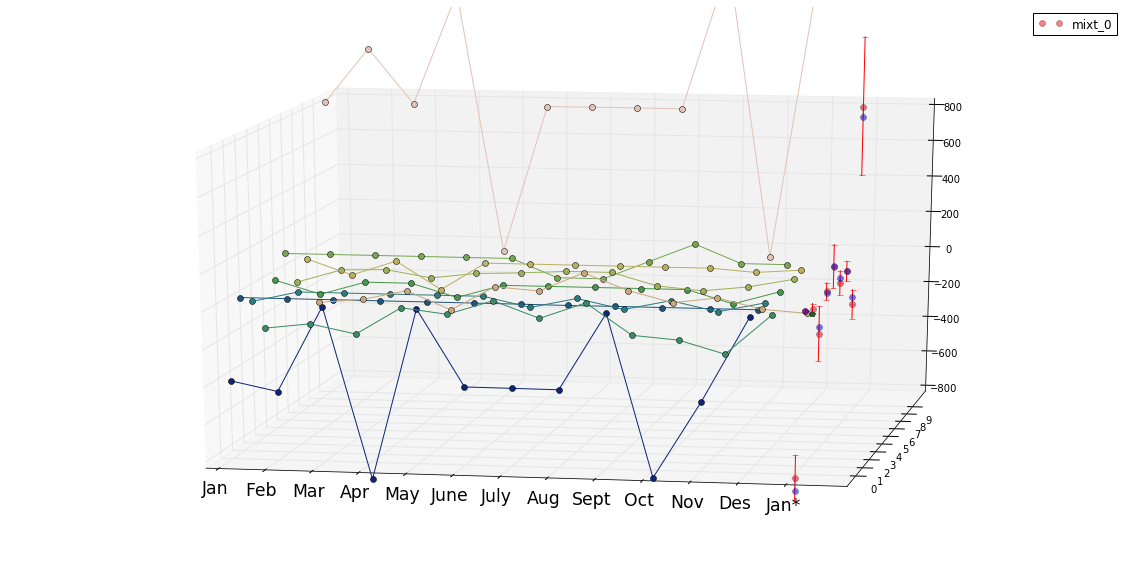

In [44]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib inline

import matplotlib.cm as cm

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

rang = 10
start = np.random.randint(0,y_val.shape[0]-rang)
v_rang = 1000

c=1
m=1

parameters = graphLP.predict(data={'input':X_val[start:start+rang]})['output']

comp = np.reshape(parameters,[-1, c + 2, m])
mu_pred = comp[:, :c, :]
sigma_pred = comp[:, c, :]
alpha_pred = comp[:, c + 1, :]
y_pred = np.zeros((len(mu_pred)))

thr_alpha = 0.5

col = cm.autumn(np.linspace(0, 1, mu_pred.shape[-1]))

cont = []
cont_const = []
const = 100
guany_sig = []
erSigConst = np.zeros((2,rang))


color = cm.gist_earth(np.linspace(0, 1, rang+2))

for elem in xrange(rang):
    ax.plot(xs=np.arange(12),ys=[elem]*12,zs=X_val_orig[start+elem,:,0].reshape(-1), c=color[elem+1], marker='o')

zerror = 500
    
for mx in xrange(mu_pred.shape[-1]):
    for i in xrange(len(mu_pred)):
        if alpha_pred[i,mx] > thr_alpha:
            ax.plot([12, 12], [i, i], [mu_pred[i,0,mx]-np.sqrt(2)*sigma_pred[i,mx],
                                       mu_pred[i,0,mx]+np.sqrt(2)*sigma_pred[i,mx]], 
                    marker="_", c=col[mx], alpha=alpha_pred[i,mx])
            y_pred[i] = mu_pred[i,0,mx]
            #In order to avoid ERROR of 0.1 when approx 0, we add a margin of 0.1€
            if mu_pred[i,0,mx]+np.sqrt(2)*sigma_pred[i,mx]+0.1<y_val[start+i] or mu_pred[i,0,mx]-np.sqrt(2)*sigma_pred[i,mx]-0.1>y_val[start+i]:
                cont += [i]
                if mu_pred[i,0,mx]+const<y_val[start+i] or mu_pred[i,0,mx]-const>y_val[start+i]:
                    guany_sig += [const-np.sqrt(2)*sigma_pred[i,mx]-0.1]
                    cont_const += [i]
                else:
                    guany_sig += [np.sqrt(2)*sigma_pred[i,mx]+0.1-const]
            elif mu_pred[i,0,mx]+const<y_val[start+i] or mu_pred[i,0,mx]-const>y_val[start+i]:
                cont_const += [i]
                guany_sig += [const-np.sqrt(2)*sigma_pred[i,mx]-0.1]
            
            erSigConst[0,i] = np.sqrt(2)*sigma_pred[i,mx]+0.1 - np.abs(mu_pred[i,0,mx]-y_val[start+i])
            erSigConst[1,i] = const - np.abs(mu_pred[i,0,mx]-y_val[start+i])
    
    tmp = alpha_pred[:,mx]>thr_alpha
    if np.sum(tmp) > 0:
        ax.plot([12]*rang,np.arange(rang)[tmp],
                    y_pred[tmp], color=col[mx],
                    linewidth=1, marker='o', linestyle=' ',
                    alpha=0.5, label='mixt_'+str(mx))
    else:
        print "Distribution",mx," has always alpha below",thr_alpha
        
for point in xrange(rang):
    if point in cont:
        ax.plot(xs=12, ys=point,zs=y_val[start+point], 
                color='green', linewidth=1, marker='p', 
                linestyle=' ',alpha=1)
    else:
        ax.plot(xs=12, ys=point,zs=y_val[start+point], 
                color='blue', linewidth=1, marker='o', 
                linestyle=' ',alpha=0.5)
    ax.plot(xs=[12, 12], ys=[point, point],zs=[y_val[start+point],y_pred[point]],
            marker="_", alpha = 0.4, color = 'purple')

ax.xaxis.set_ticks(range(13))
ax.xaxis.set_ticklabels(['Jan','Feb','Mar','Apr',
                    'May','June','July','Aug',
                    'Sept','Oct','Nov','Des','Jan*'])
ax.xaxis.set_tick_params(labelsize='xx-large')
ax.yaxis.set_ticks(range(rang))

ax.set_xlim3d(0, 13)
ax.set_ylim3d(-1, rang+1)
ax.set_zlim3d(-800, 800)
ax.view_init(15, -80)

plt.gcf().set_size_inches((20,10))
plt.legend()
plt.show()

Absolute error 9366.40744946 €
Absolut error from zero 18621.0 €
% Outside prediction noise: 20 0.9
% Outside const (100) noise: 20 0.9


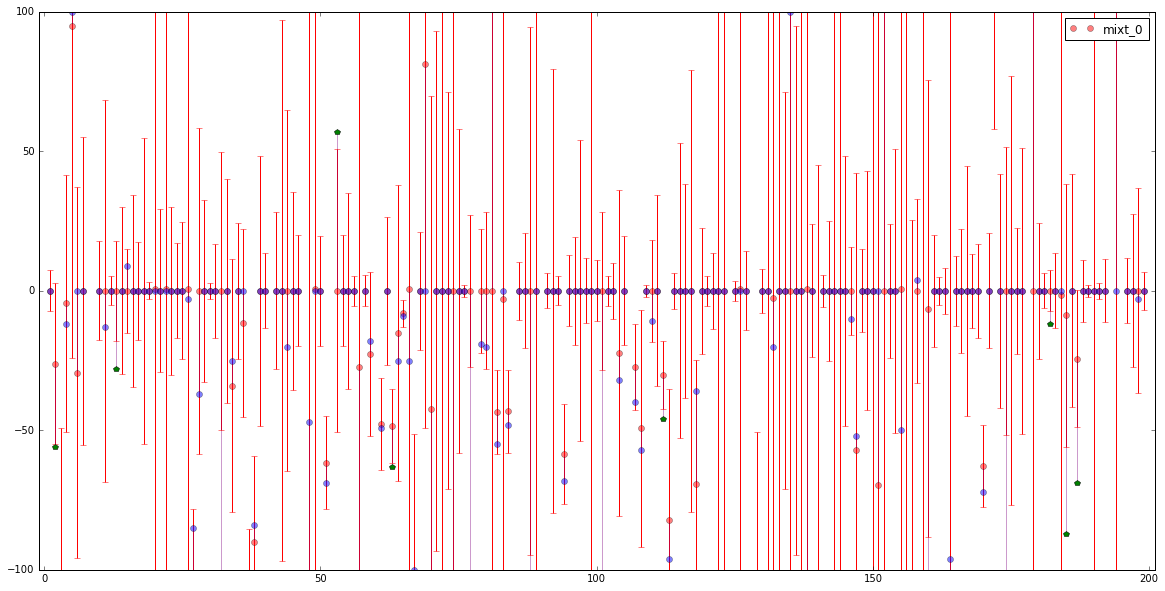

In [45]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as pyplot
from matplotlib import lines

import matplotlib.cm as cm
v_rang = 100
rang = 200

c=1
m=1

parameters = graphLP.predict(data={'input':X_val[start:start+rang]})['output']

comp = np.reshape(parameters,[-1, c + 2, m])
mu_pred = comp[:, :c, :]
sigma_pred = comp[:, c, :]
alpha_pred = comp[:, c + 1, :]
y_pred = np.zeros((len(mu_pred)))

thr_alpha = 0.5

col = cm.autumn(np.linspace(0, 1, mu_pred.shape[-1]))

cont = []
cont_const = []
const = 100
guany_sig = []
erSigConst = np.zeros((2,rang))

for mx in xrange(mu_pred.shape[-1]):
    for i in xrange(len(mu_pred)):
        if alpha_pred[i,mx] > thr_alpha:
            pyplot.errorbar(i,mu_pred[i,0,mx],
                            yerr=np.sqrt(2)*sigma_pred[i,mx],
                            alpha=alpha_pred[i,mx], 
                            color=col[mx])
            y_pred[i] = mu_pred[i,0,mx]
            #In order to avoid ERROR of 0.1 when approx 0, we add a margin of 0.1€
            if mu_pred[i,0,mx]+np.sqrt(2)*sigma_pred[i,mx]+0.1<y_val[start+i] or mu_pred[i,0,mx]-np.sqrt(2)*sigma_pred[i,mx]-0.1>y_val[start+i]:
                cont += [i]
                if mu_pred[i,0,mx]+const<y_val[start+i] or mu_pred[i,0,mx]-const>y_val[start+i]:
                    guany_sig += [const-np.sqrt(2)*sigma_pred[i,mx]-0.1]
                    cont_const += [i]
                else:
                    guany_sig += [np.sqrt(2)*sigma_pred[i,mx]+0.1-const]
            elif mu_pred[i,0,mx]+const<y_val[start+i] or mu_pred[i,0,mx]-const>y_val[start+i]:
                cont_const += [i]
                guany_sig += [const-np.sqrt(2)*sigma_pred[i,mx]-0.1]
            
            erSigConst[0,i] = np.sqrt(2)*sigma_pred[i,mx]+0.1 - np.abs(mu_pred[i,0,mx]-y_val[start+i])
            erSigConst[1,i] = const - np.abs(mu_pred[i,0,mx]-y_val[start+i])
    
    tmp = alpha_pred[:,mx]>thr_alpha
    if np.sum(tmp) > 0:
        pyplot.plot(np.arange(len(mu_pred))[tmp],
                    y_pred[tmp], color=col[mx],
                    linewidth=1, marker='o', linestyle=' ',
                    alpha=0.5, label='mixt_'+str(mx))
    else:
        print "Distribution",mx," has always alpha below",thr_alpha

for point in xrange(rang):
    if point in cont:
        pyplot.plot(point,y_val[start+point], 
                    color='green', linewidth=1, marker='p', 
                    linestyle=' ',alpha=1)
    else:
        pyplot.plot(point,y_val[start+point], 
                    color='blue', linewidth=1, marker='o', 
                    linestyle=' ',alpha=0.5)

axes = pyplot.gca()
origins = zip(np.arange(rang)*1.,y_val[start:start+rang])
endings = zip(np.arange(rang)*1.,y_pred)
lines_vals = [[origins[i],endings[i]] for i in xrange(len(origins))]

from matplotlib import collections  as mc
lc = mc.LineCollection(lines_vals, linewidths=1, alpha = 0.4, color = 'purple')
axes.add_collection(lc)
axes.set_ylim(-v_rang,v_rang)
axes.set_xlim(-1,rang+1)
pyplot.gcf().set_size_inches((20,10))
pyplot.legend()
print 'Absolute error', np.abs(y_val[start:start+rang].squeeze() - y_pred).sum(), '€'
print 'Absolut error from zero', np.abs(y_val[start:start+rang]).sum(), '€'
print '% Outside prediction noise: '+str(len(cont))+" "+str(1-len(cont)/float(rang))
print '% Outside const ('+str(const)+') noise: '+str(len(cont_const))+" "+str(1-len(cont_const)/float(rang))

In [36]:
import tensorflow as tf
tf.python.control_flow_ops = tf

config = tf.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.Session(config=config)

from keras.models import Sequential,Graph
from keras.layers.core import Dense, Dropout
from keras.callbacks import History
from keras.layers.recurrent import LSTM
from keras.models import model_from_json
from keras.regularizers import l2, activity_l2

from keras import backend as K

import numpy as np

c = 1 #The number of outputs we want to predict
m = 3 #The number of distributions we want to use in the mixture

#Note: The output size will be (c + 2) * m

def log_sum_exp(x, axis=None):
    """Log-sum-exp trick implementation"""
    x_max = K.max(x, axis=axis, keepdims=True)
    return K.log(K.sum(K.exp(x - x_max), 
                       axis=axis, keepdims=True))+x_max


def mean_log_Gaussian_like(y_true, parameters):
    """Mean Log Gaussian Likelihood distribution
    Note: The 'c' variable is obtained as global variable
    """
    components = K.reshape(parameters,[-1, c + 2, m])
    mu = components[:, :c, :]
    sigma = components[:, c, :]
    alpha = components[:, c + 1, :]
    alpha = K.softmax(K.clip(alpha,1e-8,1.))
    
    exponent = K.log(alpha) - .5 * float(c) * K.log(2 * np.pi) \
    - float(c) * K.log(sigma) \
    - K.sum((K.expand_dims(y_true,2) - mu)**2, axis=1)/(2*(sigma)**2)
    
    log_gauss = log_sum_exp(exponent, axis=1)
    res = - K.mean(log_gauss)
    return res


def mean_log_LaPlace_like(y_true, parameters):
    """Mean Log Laplace Likelihood distribution
    Note: The 'c' variable is obtained as global variable
    """
    components = K.reshape(parameters,[-1, c + 2, m])
    mu = components[:, :c, :]
    sigma = components[:, c, :]
    alpha = components[:, c + 1, :]
    alpha = K.softmax(K.clip(alpha,1e-2,1.))
    
    exponent = K.log(alpha) - float(c) * K.log(2 * sigma) \
    - K.sum(K.abs(K.expand_dims(y_true,2) - mu), axis=1)/(sigma)
    
    log_gauss = log_sum_exp(exponent, axis=1)
    res = - K.mean(log_gauss)
    return res


graphLP = Graph()
graphLP.add_input(name='input', input_shape=(12,1,), dtype='float32')
graphLP.add_node(LSTM(output_dim=128, return_sequences=True), name='LSTM1_1', input='input')
graphLP.add_node(Dropout(0.5), name='Dropout1', input='LSTM1_1')
graphLP.add_node(LSTM(output_dim=128, return_sequences=True), name='LSTM2_1', input='Dropout1')
graphLP.add_node(Dropout(0.5), name='Dropout2', input='LSTM2_1')
graphLP.add_node(LSTM(output_dim=128, return_sequences=False), name='LSTM3_1', input='Dropout2')
graphLP.add_node(Dropout(0.5), name='Dropout3', input='LSTM3_1')
graphLP.add_node(Dense(output_dim=128, activation="relu"), name='FC1', input='Dropout3')
graphLP.add_node(Dense(output_dim=c*m), name='FC_mus', input='FC1')
graphLP.add_node(Dense(output_dim=m, activation=K.exp, W_regularizer=l2(1e-3)), name='FC_sigmas', input='FC1')
graphLP.add_node(Dense(output_dim=m, activation='softmax'), name='FC_alphas', input='FC1')
graphLP.add_output(name='output', inputs=['FC_mus','FC_sigmas', 'FC_alphas'], merge_mode='concat',concat_axis=1)
graphLP.compile(optimizer='rmsprop', loss={'output':mean_log_LaPlace_like})

KeyboardInterrupt: 

In [ ]:
#dummy code
graphLP.load_weights('MDN-weights.hdf5')

In [33]:
#y_pred = model.predict(X_val)['output']
from datetime import datetime
start_time = datetime.now()
y_pred = graphLP.predict(data={'input':X_val})['output']
end_time = datetime.now()
print 
print "*********************************  Prediction ends  *********************************"
print
print('Duration: {}'.format(end_time - start_time))


*********************************  Prediction ends  *********************************

Duration: 0:04:49.670360



*********************************  Prediction ends  *********************************

Duration: 0:00:02.185090
Elements below tolerance: 654573
Mean Absolute Error:  134.436800312
Mean Squared Error:  9078183.87086
Root Mean Squared Error:  3013.00246778
Maximum Total Error:  [ 1459203.33190918](real: [-1459236.], predicted: [-32.66809082])
AE 10% 0.384212424034 (616971)

*********************************  End  *********************************

Duration: 0:00:00.385110


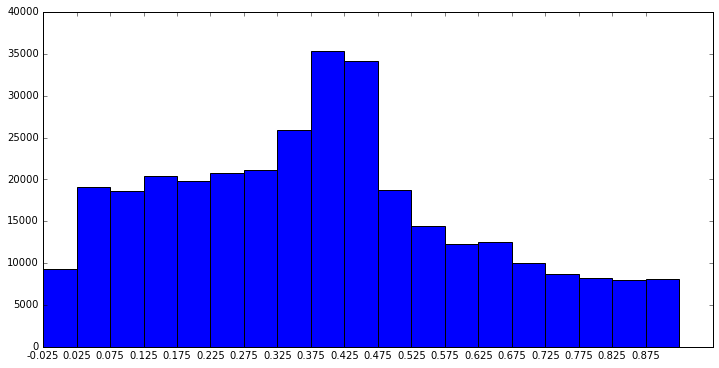

In [35]:
from datetime import datetime
start_time = datetime.now()
c=1
m=3
comp = np.reshape(y_pred,[-1, c + 2, m])
mu_pred = comp[:, :c, :]
sigma_pred = comp[:, c, :]
alpha_pred = comp[:, c + 1, :]
alpha_pred=alpha_pred.argmax(axis=1)
y_pred = np.array([mu_pred[i,:,alpha_pred[i]] for i in xrange(len(mu_pred))])

end_time = datetime.now()
print 
print "*********************************  Prediction ends  *********************************"
print
print('Duration: {}'.format(end_time - start_time))


from datetime import datetime
start_time = datetime.now()
import matplotlib.pyplot as plt
%matplotlib inline
tolerance = 1e-1
idx = np.where(np.abs(y_pred-y_val)>tolerance)[0]

print 'Elements below tolerance: ' + str(len(idx))

measure = np.mean(np.abs((y_pred-y_val*1.)))
print 'Mean Absolute Error:  ' + str(measure) 
measure = np.mean(np.power((y_pred-y_val*1.),2))
print 'Mean Squared Error:  ' + str(measure) 
measure = np.sqrt(measure)
print 'Root Mean Squared Error:  ' + str(measure) 
i = np.argmax(np.abs((y_pred-y_val*1.)))
measure = np.abs((y_pred[i]-y_val[i]*1.))
print 'Maximum Total Error:  ' + str(measure) + '(real: ' + str(y_val[i]) + ', predicted: ' + str(y_pred[i]) + ')'

measure = np.abs((y_pred[idx]-y_val[idx]))/(np.abs(y_val[idx])+1e-16)
MAE10 = np.where(measure>0.1)[0]
print 'AE 10% ' + str(1.*len(MAE10)/len(y_val)) + ' (' + str(len(MAE10)) + ')'

bins = np.arange(0,1.0,0.05)-0.025
measure = np.abs(y_pred[idx]-y_val[idx])/(np.abs(y_val[idx])+1e-16)
[dat, bins] = np.histogram(measure,bins=bins)
plt.bar(np.arange(len(dat)),dat,width =1)
plt.xticks(np.arange(len(dat)),bins[:-1])
plt.gcf().set_size_inches((10,6))

plt.gcf().set_size_inches((12,6))
 
end_time = datetime.now()
print 
print "*********************************  End  *********************************"
print
print('Duration: {}'.format(end_time - start_time))